In [1]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt

# Generate data
N = 100
w_optim = jnp.array([3.0, 4.0])

RNG = random.PRNGKey(228)

x_points = random.uniform(RNG, (N, 1)) - 0.5
b = jnp.ones_like(x_points)
X_data = jnp.hstack((x_points,b))

RNG, _ = random.split(RNG)
sigma = 2e-1
y_data = X_data @ w_optim + sigma*random.normal(RNG, (N, ))

In [58]:
# Generate optimization problem
def f(w, X=X_data, y=y_data):
    N, d = X.shape
    return 1/(2*N)*jnp.linalg.norm(X @ w - y)**2

N_ITER = 500
LR = 1e-1

def gd(f, w_0, n_iter=N_ITER, lr=LR):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "gs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["gs"].append(jnp.linalg.norm(g(w)))
    metrics["ws"].append(w)

    for i_iter in range(N_ITER):
        w -= lr*g(w)
        metrics["fs"].append(f(w))
        metrics["gs"].append(jnp.linalg.norm(g(w)))
        metrics["ws"].append(w)
    
    return metrics

RNG, _ = random.split(RNG)
# w_0 = random.normal(RNG, (2,))
w_0 = jnp.array([0.5, 3.0])

metrics = gd(f, w_0)

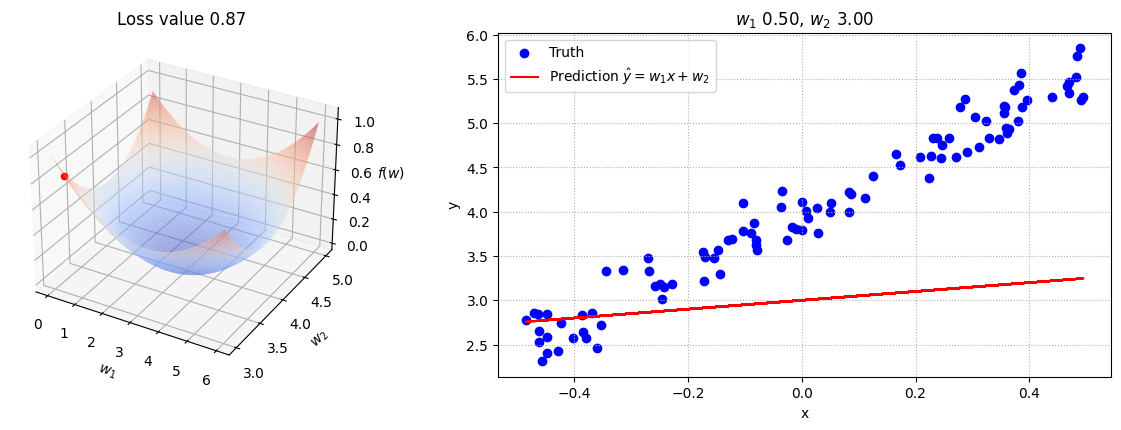

In [59]:
from matplotlib.animation import FuncAnimation
from matplotlib import gridspec
# Set up the 3D plot
fig = plt.figure(figsize=(12,4))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                width_ratios=[1, 1])
axl = fig.add_subplot(spec[0], projection='3d')
x = w_optim[0] + jnp.linspace(-3, 3, 50)
y = w_optim[1] + jnp.linspace(-1, 1, 50)
X, Y = jnp.meshgrid(x, y)
Z = jnp.array([f(jnp.array([x, y])) for x, y in zip(X.flatten(), Y.flatten())]).reshape(X.shape)
axl.plot_surface(X, Y, Z, alpha=0.5, cmap='coolwarm')
axl.scatter(w_0[0], w_0[1], f(w_0), color='red')
axl.set_xlabel(r'$w_1$')
axl.set_ylabel(r'$w_2$')
axl.zaxis.set_rotate_label(False)
axl.set_zlabel(r'$f(w)$', rotation=0)
axl.set_title(f'Loss value {f(w_0):.2f}')

# Set up the 2D plot
axr = fig.add_subplot(spec[1])
axr.scatter(X_data[:,0], y_data, label="Truth", color='blue')
prediction, = axr.plot(X_data[:,0], X_data @ w_0, label=r"Prediction $\hat{y} = w_1 x + w_2$", color='red')
axr.set_xlabel('x')
axr.set_ylabel('y')
axr.set_title(f'$w_1$ {w_0[0]:.2f}, $w_2$ {w_0[1]:.2f}')
axr.grid(linestyle=":")
axr.legend()

fig.tight_layout()
fig.subplots_adjust(left=-0.05, bottom=0.07, right=0.98, top=0.93, wspace=None, hspace=None)



# Define the animation function
def animate(i):
    print(f"{i} frame")
    axl.view_init(elev=30, azim=17)
    w = metrics["ws"][i]
    axl.scatter(w[0], w[1], f(w), color='purple')
    axl.set_title(f'Loss value {metrics["fs"][i]:.2f}')

    prediction.set_data([X_data[:,0], X_data @ w])
    axr.set_title(f'$w_1$ {w[0]:.2f}, $w_2$ {w[1]:.2f}')
    # fig.tight_layout()
    fig.subplots_adjust(left=-0.07, bottom=0.07, right=0.98, top=0.93, wspace=None, hspace=None)
    return prediction, 

# Animate the plots
ani = FuncAnimation(
    fig,
    animate,
    frames=len(metrics["ws"])
)

plt.show()

In [60]:
ani.save('test.mp4',fps=30, dpi=1000)

0 frame
0 frame
1 frame
2 frame
3 frame
4 frame
5 frame
6 frame
7 frame
8 frame
9 frame
10 frame
11 frame
12 frame
13 frame
14 frame
15 frame
16 frame
17 frame
18 frame
19 frame
20 frame
21 frame
22 frame
23 frame
24 frame
25 frame
26 frame
27 frame
28 frame
29 frame
30 frame
31 frame
32 frame
33 frame
34 frame
35 frame
36 frame
37 frame
38 frame
39 frame
40 frame
41 frame
42 frame
43 frame
44 frame
45 frame
46 frame
47 frame
48 frame
49 frame
50 frame
51 frame
52 frame
53 frame
54 frame
55 frame
56 frame
57 frame
58 frame
59 frame
60 frame
61 frame
62 frame
63 frame
64 frame
65 frame
66 frame
67 frame
68 frame
69 frame
